# Week 08, Assignment 02: JSON
# Ah JavaScript, our old friend.
In this lesson we will be learning what JSON is used for and how it we can quickly manipulate JSON objects in Python.

### Objective 1: Serial or deserial 
What is the difference between serialization and deserialization when using JSON in Python? Draw a small diagram to help illustrate your explanation.

### Serialization: Python to JSON

* To convert a complex object, let's say a dictionary, into JSON. The object needs to be **encoded** into **series** of bytes - serialization. 
* The thing in question can be encoded/decoded backwards and forwards, giving us the format we want. 

![](https://www.tutorialexample.com/wp-content/uploads/2019/07/serialize-and-deserialize-python-object-660x300.png)



* By default, the JSON **encoder** only understands native Python data types (str, int, float, bool, list, tuple, and dict) and turning it into the corresponding JSON type. See below. 

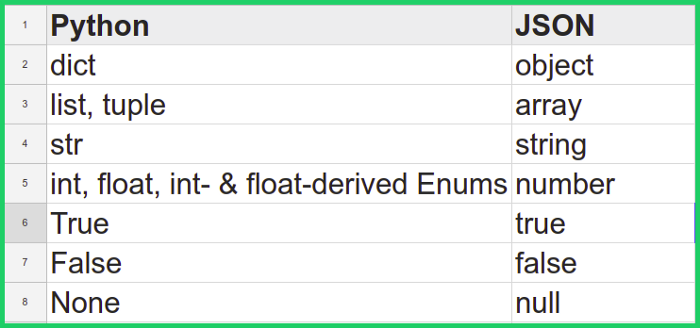

### Deserialization: JSON to Python

* Deserialization is the reverse of serialization. It involves **decoding** the **series** of bytes data received in the JSON format, to the native data types.

* It is like the table above,but the other way around. Going from right to left

### Objective 2: Getting ready for JSON
Below is class object for Boat objects. Execute the cell and make sure you understand how the objects are generated. Then write a `toDict` function that will convert our Boat property into a Dictionary that can easily be made into JSON. Ensure all the properties of our Boat object is present in the dict, use the property variable names and suitable string keys.

In [8]:
class Boat:
    _type = None
    _model = None
    _color = None
    _engines = None
    _topspeed = None
    
    def __init__(self,t,m,c,e,ts):
        self._type = t
        self._model = m
        self._color = c
        self._engines = list(e)
        self._topspeed = int(ts)
    
    def __str__(self):
        return f"A {self._type} Boat, model {self._model}. {len(self._engines)} engine{'' if len(self._engines) == 1 else 's'} with a top speed of {self._topspeed} knots."
    
    def toDict(self): # Making sure it returns a dictionary object that has all the declared variables. 
        return dict(_type = self._type, _model = self._model, _color = self._color, _engines = self._engines, _topspeed = self._topspeed)

In [9]:
y500 = Boat("Fishing","Yamaha 5000","Blue and White",["Mariner 50","Mariner 50"],80)
sbx3 = Boat("Dingey","Supersport Blueline X3","Yellow",[],5)
ebbb = Boat("Speedboat","Essential BBB","Red and White",["Pegasus 5000"],100)
print(y500)

print(type(Boat.toDict(y500))) # Calling the toDict method with the Boat object as the argument. It is a 'dict' indeed

A Fishing Boat, model Yamaha 5000. 2 engines with a top speed of 80 knots.
<class 'dict'>


### Objective 3: Ship it!
Convert our `y500`, `sbx3`, `ebbb` object into JSON and print the resulting text to console and output them to a text filed called `Boats.json`.

In [10]:
import json

y500_dict = Boat.toDict(y500)
sbx3_dict = Boat.toDict(sbx3)
ebbb_dict = Boat.toDict(ebbb)


try:
    with open("Boats.json","w") as output_file:
        
        json.dump([y500_dict,sbx3_dict, ebbb_dict] ,output_file, sort_keys=True) # When trying to write multiple line into the JSON file, an error occurs. 
        # Also when trying to append, one by one. Probably cuz only ONE root per JSON file, and when appending - no way of knowing that each boat gets enumerated. 
        # Walkaround: Using a list as the top-level element, 
        
#         json.dump(sbx3_dict,output_file) # This did me wrong.
#         json.dump(ebbb_dict,output_file)

except:
    print("something happened")

In [11]:
help(json.dump)
# Has many features, sort_keys=True sorts the keys in alphabetical order.  

Help on function dump in module json:

dump(obj, fp, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` as a JSON formatted stream to ``fp`` (a
    ``.write()``-supporting file-like object).
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the strings written to ``fp`` can
    contain non-ASCII characters if they appear in strings contained in
    ``obj``. Otherwise, all such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``OverflowError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    serializ

### Ojective 4: Read it back to me
Using the output from `Boats.json` as input, read our data back into memory and convert it to dicts into memory. Print the resulting dicts to console to prove you understand how to load JSON into memory

In [5]:
with open("Boats.json", "r") as incoming:
    list_with_dict = json.load(incoming)
    print(list_with_dict)
    print("--"*50)
    print(*list_with_dict) # We are unpacking argument lists
    
print("--"*50)

y500_dict = list_with_dict[0] #TODO instead of doing 0,1,2. Slack
print(y500_dict)


[{'_color': 'Blue and White', '_engines': ['Mariner 50', 'Mariner 50'], '_model': 'Yamaha 5000', '_topspeed': 80, '_type': 'Fishing'}, {'_color': 'Yellow', '_engines': [], '_model': 'Supersport Blueline X3', '_topspeed': 5, '_type': 'Dingey'}, {'_color': 'Red and White', '_engines': ['Pegasus 5000'], '_model': 'Essential BBB', '_topspeed': 100, '_type': 'Speedboat'}]
----------------------------------------------------------------------------------------------------
{'_color': 'Blue and White', '_engines': ['Mariner 50', 'Mariner 50'], '_model': 'Yamaha 5000', '_topspeed': 80, '_type': 'Fishing'} {'_color': 'Yellow', '_engines': [], '_model': 'Supersport Blueline X3', '_topspeed': 5, '_type': 'Dingey'} {'_color': 'Red and White', '_engines': ['Pegasus 5000'], '_model': 'Essential BBB', '_topspeed': 100, '_type': 'Speedboat'}
----------------------------------------------------------------------------------------------------
{'_color': 'Blue and White', '_engines': ['Mariner 50', 'Marin

### Objective 5: Getting fancy with the objects
Copy the code for the Boat class and add the following features:
* When a boat object is created it can either be given the traditional `(t,m,c,e,ts)` parameters or a JSON string
* Rewrite the init function to dynamically either create the object normally or convert the JSON string into a dict which then populates the object attributes
* Write a `pretty()` class function that will return all the class parameters to a JSON style string.

You program must successfully create and execute the data below.

Hint: Your init function might benefit from using `*args`

In [12]:
import json

class Boat2:
    
    def __init__(self, *arg):
            if len(arg) < 2:
                #Make to dict. -convert the JSON string into a dict which then populates the object attributes
                print(arg[0])
                arg_dict = json.loads(arg[0]) # Making it from tuple to dict. The keys are called to put into class variables. 

                self._type = arg_dict["type"]
                self._model = arg_dict["model"]
                self._color = arg_dict["color"]
                self._engines = arg_dict["engines"]
                self._topspeed = arg_dict["topspeed"]
                
            else:
                self._type = arg[0] # When the tuple is in form of a list, instead of keys, using the indexes.
                self._model = arg[1]
                self._color = arg[2]
                self._engines = arg[3]
                self._topspeed = arg[4]
    
    def __str__(self):
        return f"A {self._type} Boat, model {self._model}. engine with a top speed of {self._topspeed} knots." 
    
    def pretty(self):
        return json.dumps(self, default=lambda o: o.__dict__, sort_keys=True, indent=4) 
        
        # First time around, the function looked like below. Then it gave me ERROR: Object of type Boat2 is not JSON serializable. WHY?
        # return json.dumps(self) 

In [13]:
import json
y500 = Boat2("Fishing","Yamaha 5000","Blue and White",["Mariner 50","Mariner 50"],80, "hiit", 50)
print(y500)
print("--"*50)
y500_2 = Boat2('{"type": "Fishing", "model": "Yamaha 5000", "color": "Blue and White", "engines": ["Mariner 50", "Mariner 50"], "topspeed": 80}')
print(y500_2._engines)
print(y500_2)
print("--"*50)
print("First boat:", y500.pretty())
print("Second boat:", y500_2.pretty())

A Fishing Boat, model Yamaha 5000. engine with a top speed of 80 knots.
----------------------------------------------------------------------------------------------------
{"type": "Fishing", "model": "Yamaha 5000", "color": "Blue and White", "engines": ["Mariner 50", "Mariner 50"], "topspeed": 80}
['Mariner 50', 'Mariner 50']
A Fishing Boat, model Yamaha 5000. engine with a top speed of 80 knots.
----------------------------------------------------------------------------------------------------
First boat: {
    "_color": "Blue and White",
    "_engines": [
        "Mariner 50",
        "Mariner 50"
    ],
    "_model": "Yamaha 5000",
    "_topspeed": 80,
    "_type": "Fishing"
}
Second boat: {
    "_color": "Blue and White",
    "_engines": [
        "Mariner 50",
        "Mariner 50"
    ],
    "_model": "Yamaha 5000",
    "_topspeed": 80,
    "_type": "Fishing"
}
